In [31]:
using Plots

using NBInclude
@nbinclude("localsearch.ipynb")
@nbinclude("testing_RM.ipynb")


In [32]:
n = 5
x = 4

max_dcj_dist = n + x

target = generate_target_with_xdup(n, x)
src = scramble_target(target)

total_maps = 5
rand_maps = 3
max_neighbors = 2

mode = "none"
dupchar_to_unique_chars = OrderedDict{Char, Vector{Char}}()
min_change_neighbor = true 

_, _, _, map_to_dedupstr_dcjdist_MCN, og_rm_MCN = localsearch(src, target, total_maps, rand_maps, max_neighbors, mode, dupchar_to_unique_chars, min_change_neighbor)


_, _, _, map_to_dedupstr_dcjdist_OLD, og_rm_OLD = localsearch(src, target, total_maps, rand_maps, max_neighbors, mode, dupchar_to_unique_chars, !min_change_neighbor)

SRC .c.,aeb,.db.,e,ec --> TARGET abceecbde
total maps=5 || num_rand_maps=3 || max_neighbors=2


SRC .c.,aeb,.db.,e,ec --> TARGET abceecbde
total maps=5 || num_rand_maps=3 || max_neighbors=2




(7, [2, 6, 2], ".o.,afp,.db.,v,ec", Dict([2, 3, 1] => (".c.,avp,.db.,e,fo", 9), [1, 6, 2] => (".o.,afb,.dp.,v,ec", 8), [2, 1, 2] => (".o.,aep,.db.,v,fc", 8), [2, 6, 2] => (".o.,afp,.db.,v,ec", 7), [2, 5, 1] => (".c.,afp,.db.,e,vo", 7)), Dict([2, 3, 1] => (".c.,avp,.db.,e,fo", 9), [2, 6, 2] => (".o.,afp,.db.,v,ec", 7), [2, 5, 1] => (".c.,afp,.db.,e,vo", 7)))

max dcj dist=9

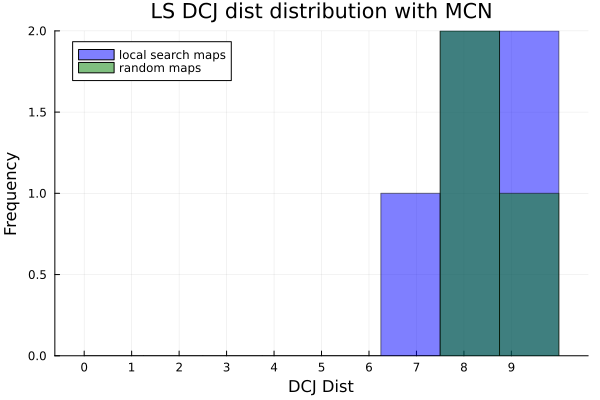

In [37]:
rm_dcj_dists = [tupl[2] for tupl in values(og_rm_MCN)]
dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_MCN)]

print("max dcj dist=", max_dcj_dist)

xticks = collect(0:max_dcj_dist)

bins_range = range(0, maximum(max_dcj_dist)+1, maximum(max_dcj_dist))
histogram(dcjdists, xticks=xticks, bins=bins_range, title="LS DCJ dist distribution with MCN", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)


[9, 8, 8, 7, 7]max dcj dist=9

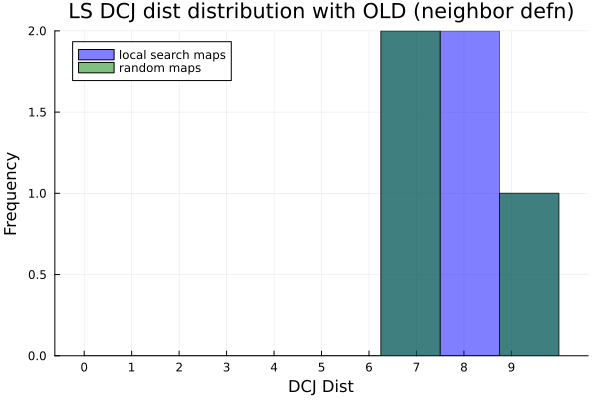

In [38]:
rm_dcj_dists = [tupl[2] for tupl in values(og_rm_OLD)]
dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_OLD)]
print(dcjdists)

print("max dcj dist=", max_dcj_dist)

xticks = collect(0:max_dcj_dist)

bins_range = range(0, maximum(max_dcj_dist)+1, maximum(max_dcj_dist))
histogram(dcjdists, xticks=xticks, bins=bins_range, title="LS DCJ dist distribution with OLD (neighbor defn)", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)